In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_excel('datosejercicioevaluacionanchuras.xlsx')
df_1 = df[df['Época histórica']==1] # Predinástico temprano
df_2 = df[df['Época histórica']==2] # Predinástico tardío

En primer lugar, vamos a obtener las diferentes medidas de centralización, dispersión, asimetría y curtosis para la anchura de los cráneos del periodo predinástico temprano.

In [95]:
valores_1 = pd.DataFrame(df_1['Anchura del cráneo'].describe())
valores_1.reset_index(inplace=True)
valores_1.rename(columns={'index':'Medida'},inplace = True)
valores_1

,Medida,Anchura del cráneo
0,count,30.000000
1,mean,131.533333
2,std,0.819307
3,min,130.000000
4,25%,131.000000
5,50%,131.500000
6,75%,132.000000
7,max,134.000000


In [96]:
moda = df_1['Anchura del cráneo'].mode()
moda

0    131
1    132
Name: Anchura del cráneo, dtype: int64

In [97]:
rango = df_1['Anchura del cráneo'].max() - df_1['Anchura del cráneo'].min()
rango

4

In [98]:
varianza = df_1['Anchura del cráneo'].var()
varianza

0.6712643678160921

In [99]:
# Coeficiente de variacion de Pearson = desv. estandar / media
pearson = valores_1.loc[2][1]/valores_1.loc[1][1]
pearson

0.006228894440395486

In [100]:
# Pre-calculo de asimetria y curtosis
df_1['Xi - Media'] = df_1['Anchura del cráneo'] - valores_1.loc[1][1]
df_1['(Xi - Media)*3'] = df_1['Xi - Media']**3
df_1['(Xi - Media)*4'] = df_1['Xi - Media']**4

In [101]:
fischer = df_1['(Xi - Media)*3'].sum()/((df_1['Época histórica'].count()-1)*math.pow(valores_1.loc[2][1],3))
fischer

0.6459405126888941

In [102]:
curtosis = df_1['(Xi - Media)*4'].sum()/((df_1['Época histórica'].count()-1)*math.pow(valores_1.loc[2][1],4)) -3
curtosis

1.1608932257459212

Ahora obtendremos el histograma y el diagrama de caja y bigotes.

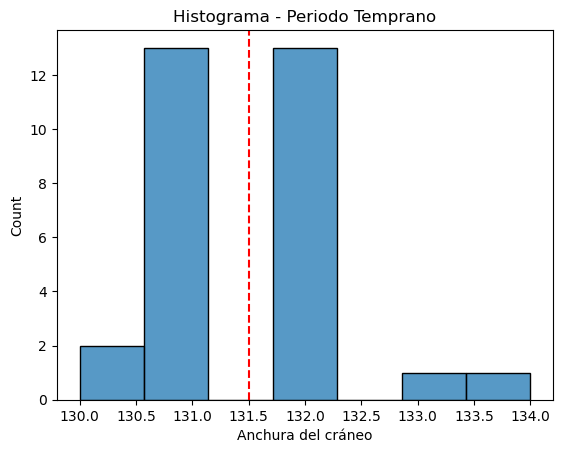

In [103]:
sns.histplot(data=df_1['Anchura del cráneo'])
plt.axvline(x=valores_1.loc[5][1], color='red', linestyle='--')
plt.title('Histograma - Periodo Temprano')
plt.show()

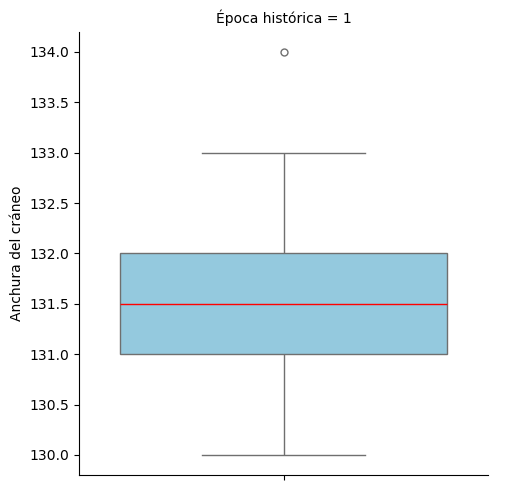

In [104]:
sns.catplot(data=df_1, y='Anchura del cráneo', col='Época histórica', kind='box', color='skyblue', medianprops={'color':'red'} )
plt.show()

Ahora repetimos los procesos anteriores para el periodo predinástico tardío.

In [105]:
valores_2 = pd.DataFrame(df_2['Anchura del cráneo'].describe())
valores_2.reset_index(inplace=True)
valores_2.rename(columns={'index':'Medida'},inplace = True)
valores_2

,Medida,Anchura del cráneo
0,count,30.000000
1,mean,132.466667
2,std,1.008014
3,min,131.000000
4,25%,132.000000
5,50%,133.000000
6,75%,133.000000
7,max,135.000000


In [106]:
moda = df_2['Anchura del cráneo'].mode()
moda

0    133
Name: Anchura del cráneo, dtype: int64

In [107]:
rango = df_2['Anchura del cráneo'].max() - df_2['Anchura del cráneo'].min()
rango

4

In [108]:
varianza = df_2['Anchura del cráneo'].var()
varianza

1.0160919540229887

In [109]:
pearson = valores_2.loc[2][1]/valores_2.loc[1][1]
pearson

0.007609566175043748

In [110]:
df_2['Xi - Media'] = df_2['Anchura del cráneo'] - valores_2.loc[1][1]
df_2['(Xi - Media)*3'] = df_2['Xi - Media']**3
df_2['(Xi - Media)*4'] = df_2['Xi - Media']**4

In [111]:
fischer = df_2['(Xi - Media)*3'].sum()/((df_2['Época histórica'].count()-1)*math.pow(valores_2.loc[2][1],3))
fischer

0.1918262295493577

In [112]:
curtosis = df_2['(Xi - Media)*4'].sum()/((df_2['Época histórica'].count()-1)*math.pow(valores_2.loc[2][1],4)) -3
curtosis

-0.2800290739337874

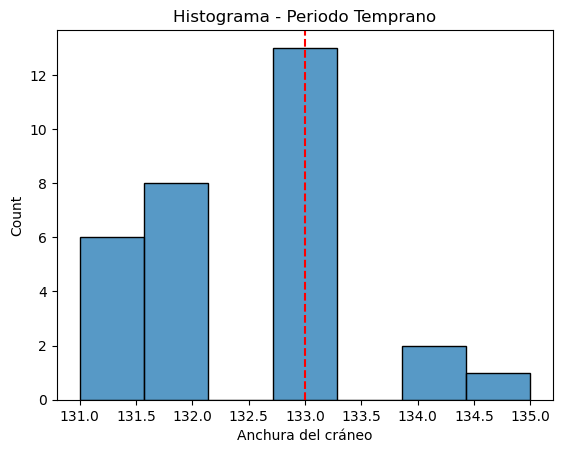

In [113]:
sns.histplot(data=df_2['Anchura del cráneo'])
plt.axvline(x=valores_2.loc[5][1], color='red', linestyle='--')
plt.title('Histograma - Periodo Temprano')
plt.show()

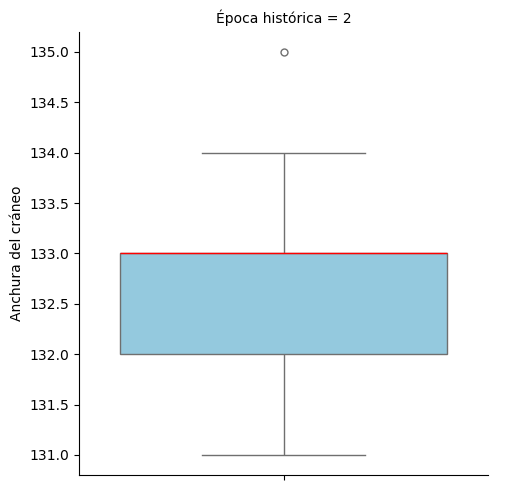

In [114]:
sns.catplot(data=df_2, y='Anchura del cráneo', col='Época histórica', kind='box', color='skyblue', medianprops={'color':'red'} )
plt.show()

#### **Análisis de las muestras**
##### Predinástico temprano

Respecto al periodo predinástico temprano, las medidas de centralización nos indican que la muestra es relativamente simétrica, ya que tenemos una media de 131.53 y una mediana muy similar, de 131.5. Además, tenemos dos modas, es decir, dos valores que son los más frecuentes, que son justamente 131 y 132, los valores alrededor de la media. Esta tesis se refuerza analizando las medidades de la dispersión, con una desviación estándar de 0.82, una varianza de 0.67 y un rango de 4mm, lo cual indica que la variabilidad es pequeña.

Si analizamos la simetría con el coeficiente de variación de Pearson, obtenemos un valor de 0.006, muy próximo a 0, y que compararemos posteriormente con el de la segunda muestra. El coeficiente de asimetría de Fischer es de 0.65 que, si bien es mayor que 0 (lo cual indicaría una distribución ligeramente ladeada a la derecha), es tan cercano a 0 que podríamos considerar que es una distribución simétrica. Por último, el coeficiente de curtosis nos da una idea de como de "achatada" es la distribución. En este caso, un valor de 1.16 nos indica que es leptocúrtica, es decir, que los valores se concentran en torno al eje de simetría.

##### Predinástico tardío
En este caso, tenemos unos resultados similares al anterior caso en lo que a las medidas de centralización se refiere. Con una media de 132.47 y una mediana de 133, coincidente con la moda también, nos indica que la muestra es simétrica. La desviación estándar es ligeramente superior, de 1.01, y similar a la varianza, de 1.02, pero el rango es el mismo, 4mm en ambos casos.

Respecto a la asimetría, tenemos un coeficiente de variación de Pearson de 0.0076, indicando de nuevo una variable simétrica; y un coeficiente de Fischer de 0.19, que nos indica que, si bien la distribución está muy ligeramente ladeada hacia la derecha, es casi simétrica. Por último, el coeficiente de curtosis es en este caso -0.28, es decir, una distribución mesocúrtica, más abierta, donde los valores no se concentran tanto en torno al eje de simetría.

##### Comparación
En ambos casos, se trata de distribuciones muy simétricas, ya que todas las medidas de dispersión son bastante similares entre sí. Se puede observar que tanto la media como la mediana del predinástico tardío son superiores a las del predinástico temprano. Esto nos indica que los cráneos eran en general más anchos en este período. Además, tenemos también una mayor desviación estándar, lo cual nos indica que, aunque el rango es el mismo en ambos casos, hay más variabilidad en las medidas en este período más reciente. 

Por último, tenemos en ambos casos distribuciones simétricas, aunque es cierto que la del predinástico tardío tiende a ser menos concentrada en torno a la media, como es indicado por el coeficiente de curtosis, y por un coeficiente de Pearson ligeramente superior. Aún así, y como se observa también en el histograma y en el diagrama de caja y bigotes, tenemos dos muestras igualmente simétricas, y ambas con unos valores y formas prácticamente iguales.